In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = pd.read_csv('rees46_customer_model.csv')
# Split data
X = dataset.drop(columns=["target_event"])
y = dataset["target_event"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

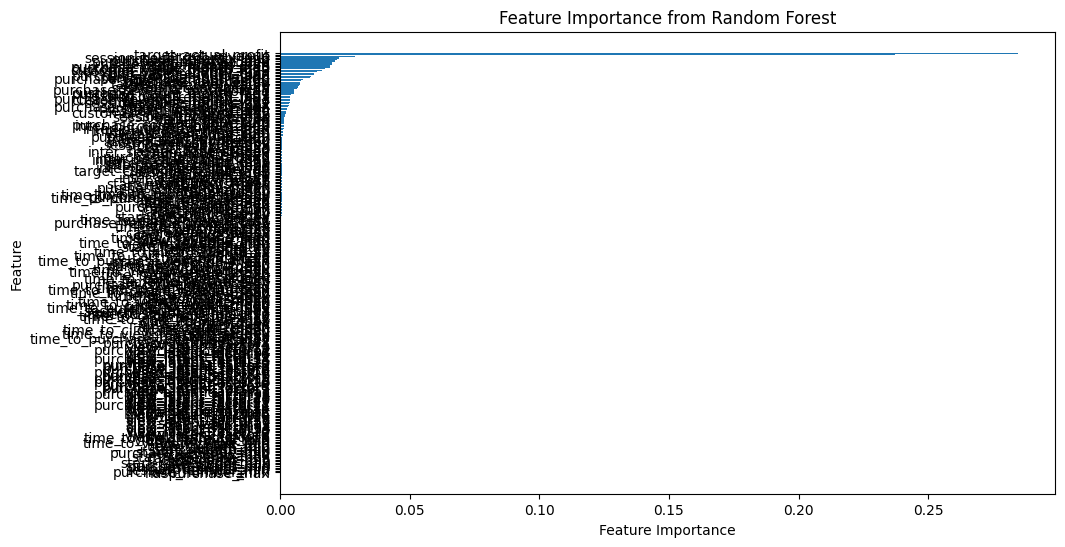

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [6]:
feature_importances[0:20]

,Feature,Importance
274,target_actual_profit,0.284834
270,target_revenue,0.237363
191,session_count_month_lag0,0.028898
94,purchase_recency_min,0.022606
61,purchase_number_sum,0.021771
154,purchase_number_stddev,0.021208
91,session_recency_min,0.019815
42,haspurchase_sum,0.019786
200,purchase_count_month_ma3,0.019279
206,customer_value_month_lag0,0.019208


In [4]:
selected_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate
y_pred = rf_model_selected.predict(X_test_selected)


In [5]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, random_state=42)
perm_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)


KeyboardInterrupt: 